In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import  KDTree, BallTree
import matplotlib.pyplot as plt

In [2]:
def data_extraction(data_path):
    data = pd.read_csv(data_path)
    data.drop(columns=['Name'], inplace=True)
    feature = data.keys()[:-1]
    X = data.to_numpy(dtype='float64')
    y = X[:, -1]
    X = X[:, :-1]
    return X, y

def result(truth, prediction):
    global all_result
    all_result.append(prediction)
    threshold = 0.1
    error = prediction - truth
    MSE = np.sum(np.power(error, 2)) / error.shape[0]
    print(f'Accuracy under the threshold {threshold}: {len(truth[abs(truth - prediction) <= threshold]) / len(truth) * 100}')
    print(f'MSE: {MSE}')
    compare = [truth, prediction]
    compare = np.array(compare)
    compare = compare.transpose()
    compare.sort(axis=0)
    x = list(range(len(compare)))
    Tplot = plt.scatter(x, compare[:, 0], s=2)
    Pplot = plt.scatter(x, compare[:, 1], s=2)
    plt.legend(handles=[Pplot, Tplot], labels=['y_pred', 'y_truth'])
    plt.show()

In [3]:
train_data_path = './dataset/train.csv'
test_data_path = './dataset/test.csv'
filter_data_path = './dataset/filter_train_data.csv'
X_train, y_train = data_extraction(train_data_path)
X_test, y_test = data_extraction(test_data_path)
X_filter, y_filter = data_extraction(filter_data_path)
all_result = []


## Linear Regression

In [4]:
def linear_regression(X_train, y_train, X_test, y_test):
    LR = LinearRegression()
    threshold = 0.1
    LR.fit(X_train, y_train)
    prediction = LR.predict(X_test)
    print(f'Score: {LR.score(X_test, y_test) * 100}')
    result(y_test, prediction)


Score: 56.324254327592996
Accuracy under the threshold 0.1: 43.04635761589404
MSE: 0.04099663202720404


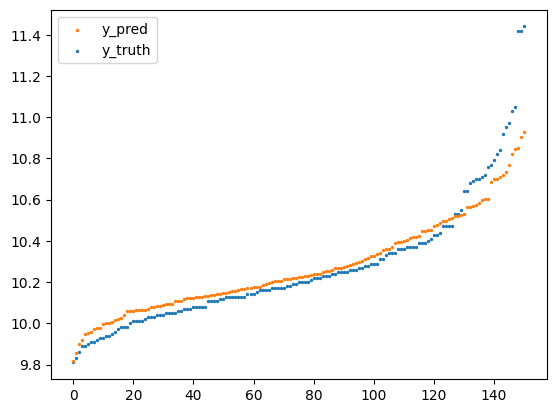

Score: 60.55846000500529
Accuracy under the threshold 0.1: 46.35761589403973
MSE: 0.03702215673406583


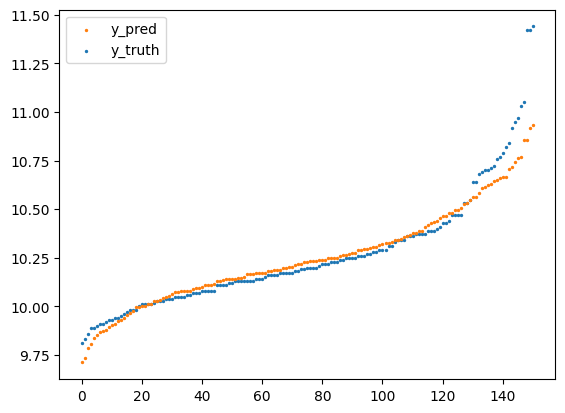

In [5]:
linear_regression(X_train, y_train, X_test, y_test)
linear_regression(X_filter, y_filter, X_test, y_test)


## Neural Network

In [6]:
def deep_learning(X_train, y_train, X_test, y_test, batch_size=10, lr=1e-5, hidden_layer=20):
    MLP = MLPRegressor(random_state=10, hidden_layer_sizes=hidden_layer, batch_size=batch_size, verbose=False, learning_rate_init=lr, max_iter=5000)
    MLP.fit(X_train, y_train)
    prediction = MLP.predict(X_test)
    print(f'Score: {MLP.score(X_test, y_test) * 100}')
    result(y_test, prediction)

Score: -128.23299558014244
Accuracy under the threshold 0.1: 5.960264900662252
MSE: 0.21423295680963989


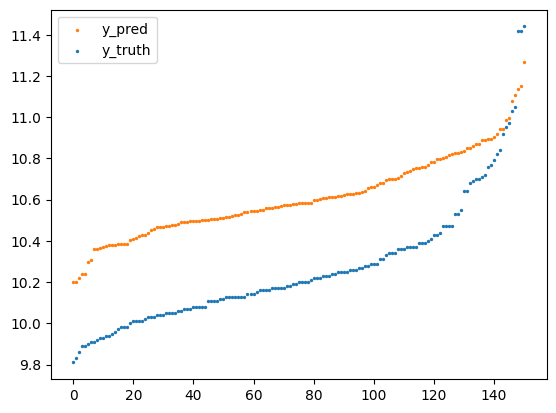

Score: -108.13410405006545
Accuracy under the threshold 0.1: 9.933774834437086
MSE: 0.195366951260619


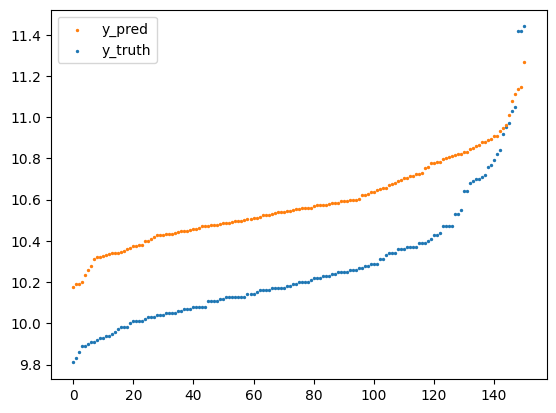

In [7]:
layers = (10, 10, 10, 10)
deep_learning(X_train, y_train, X_test, y_test, hidden_layer=layers, batch_size=100, lr=5e-6)
deep_learning(X_filter, y_filter, X_test, y_test, hidden_layer=layers,batch_size=50, lr=5e-6)


## SVM

In [8]:
def svm(X_train, y_train, X_test, y_test):
    svr = SVR(kernel='poly', degree=20, C=8.5)
    svr.fit(X_train, y_train)
    prediction = svr.predict(X_test)
    print(f'Score: {svr.score(X_test, y_test) * 100}')
    result(y_test, prediction)
    


Score: 53.13513612406023
Accuracy under the threshold 0.1: 38.41059602649007
MSE: 0.04399012655073521


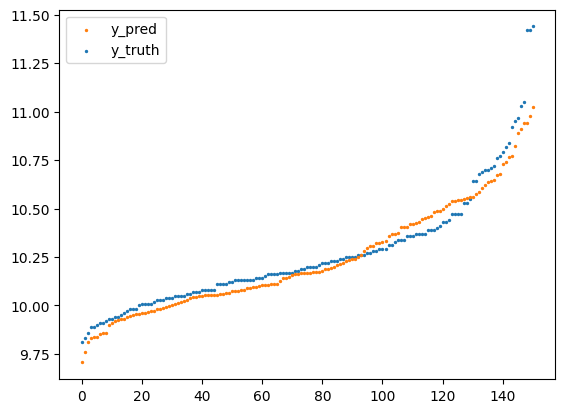

Score: 50.73113067335906
Accuracy under the threshold 0.1: 34.437086092715234
MSE: 0.04624666791795115


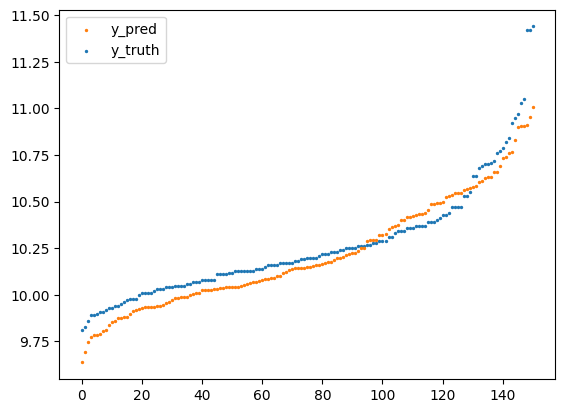

In [9]:
svm(X_train, y_train, X_test, y_test)
svm(X_filter, y_filter, X_test, y_test)


## Nearest Neighbor Regression

In [10]:
def kd(X_train, y_train, X_test, y_test):
    tree = KDTree(X_train)
    neighbor = list(int(ele[0]) for ele in tree.query(X_test, return_distance=False))
    prediction = y_train[neighbor]
    result(y_test, prediction)

Accuracy under the threshold 0.1: 26.490066225165563
MSE: 0.13674238410596024


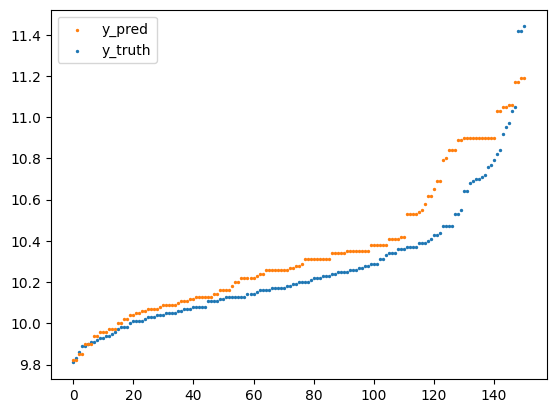

Accuracy under the threshold 0.1: 24.503311258278146
MSE: 0.13496622516556286


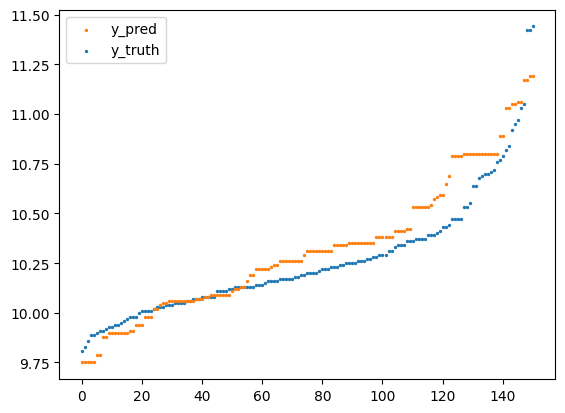

In [11]:
kd(X_train, y_train, X_test, y_test)
kd(X_filter, y_filter, X_test, y_test)


In [12]:
all_result.append(y_test)

In [13]:
all_result_np = np.array(all_result)
all_result_np = all_result_np.transpose()
all_result_np.sort(axis=0)
methods = ['linear', 'mlp', 'svm', 'kd-tree', 'y_truth']
x = list(range(all_result_np.shape[0]))



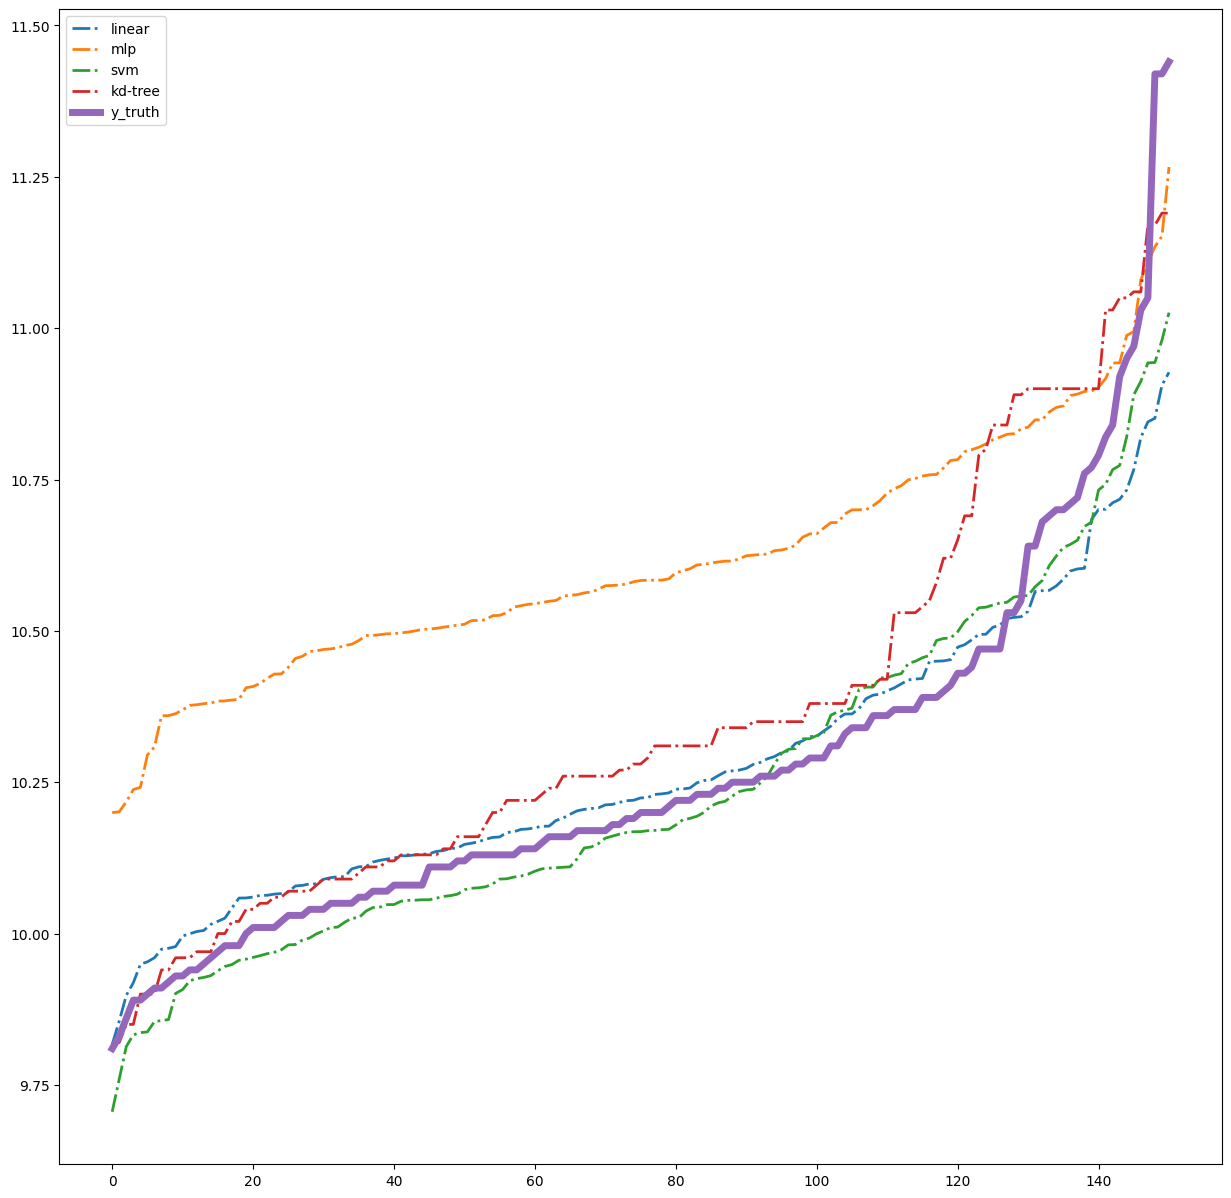

In [14]:
plt.figure(figsize=(15, 15))
for i in range(all_result_np.shape[1] - 1):
    if i % 2 == 0:
        plt.plot(x, all_result_np[:, i], label=methods[i//2], linestyle='-.', linewidth=2)
plt.plot(x, all_result_np[:, -1], label=methods[-1], linewidth=5)
plt.legend()
plt.show()


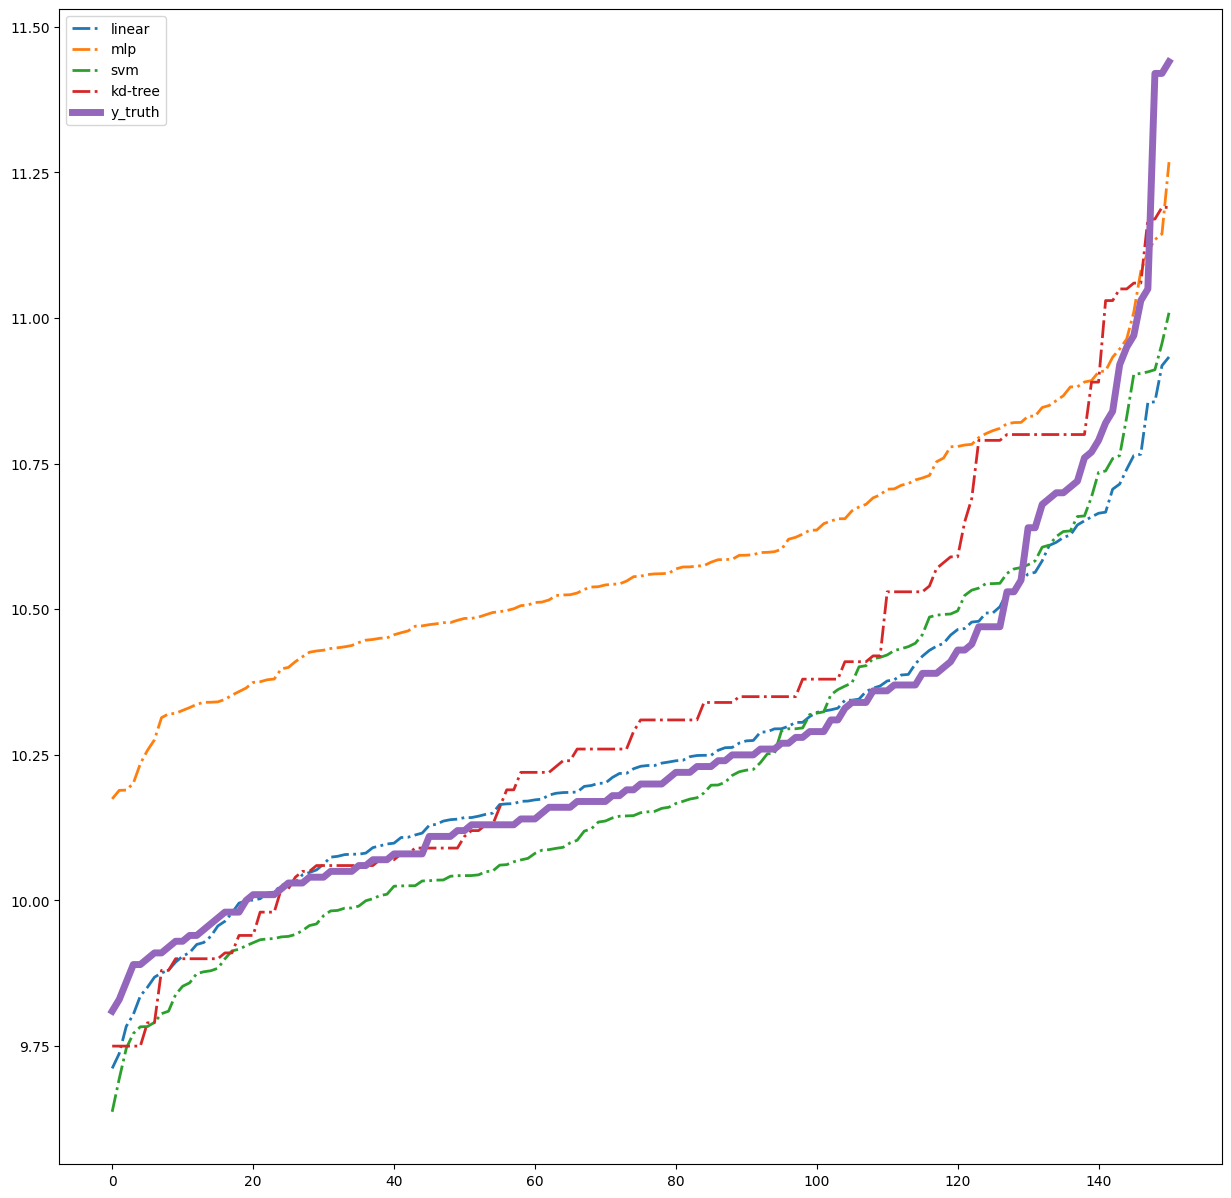

In [15]:
plt.figure(figsize=(15, 15))
for i in range(all_result_np.shape[1] - 1):
    if i % 2 == 1:
        plt.plot(x, all_result_np[:, i], label=methods[i//2], linestyle='-.', linewidth=2)
plt.plot(x, all_result_np[:, -1], label=methods[-1], linewidth=5)

plt.legend()
plt.show()